# Pandas

**pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.

In [ ]:
# Install pandas
!pip install pandas

### Loading Dataframes

In [1]:
import pandas as pd

# from csv file
df_from_csv = pd.read_csv('./data/employees.csv')

df_from_csv.head()  # show first 5 rows

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired
0,E1000,Emma,Gutierrez,IT,Executive,Makati,58,86907,2020-07-08
1,E1001,Maria,Perez,HR,Executive,Taguig,33,88777,2019-10-14
2,E1002,Diego,Santos,Operations,Clerk,Manila,24,43977,2017-12-14
3,E1003,Isabel,Rivera,Finance,Engineer,Taguig,22,73624,2019-04-19
4,E1004,John,Hernandez,Finance,Executive,Makati,54,93321,2014-07-25


### Basic Data Frame Operations

In [2]:
# 1. Number of Rows and Columns
df_from_csv.shape

(100, 9)

In [3]:
# 2. Column names and data types
df_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  100 non-null    object
 1   FirstName   100 non-null    object
 2   LastName    100 non-null    object
 3   Department  100 non-null    object
 4   Position    100 non-null    object
 5   City        100 non-null    object
 6   Age         100 non-null    int64 
 7   Salary      100 non-null    int64 
 8   DateHired   100 non-null    object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [4]:
# 3. Statistics summary of numeric columns

df_from_csv.describe()

,Age,Salary
count,100.000000,100.000000
mean,41.540000,75045.880000
std,10.806302,28081.470985
min,22.000000,26531.000000
25%,33.000000,51035.000000
50%,41.500000,76601.500000
75%,50.250000,89498.250000
max,59.000000,140004.000000


In [5]:
# 4. sort values by 'Age' column
df_from_csv.sort_values(by='Age').head()

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired
3,E1003,Isabel,Rivera,Finance,Engineer,Taguig,22,73624,2019-04-19
97,E1097,Victor,Rivera,IT,Executive,Makati,22,116514,2018-09-10
90,E1090,Mark,Flores,Finance,Executive,Manila,23,70117,2020-02-27
10,E1010,Ruth,Aquino,Marketing,Manager,Taguig,23,135645,2016-10-23
2,E1002,Diego,Santos,Operations,Clerk,Manila,24,43977,2017-12-14


In [6]:
# 5. add new 'Age Group' column based on 'Age'

def categorize_age(age):
    if age < 30:
        return 'Young'
    else:
        return 'Adult'

df_from_csv['Age Group'] = df_from_csv['Age'].apply(categorize_age)

df_from_csv.head()

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired,Age Group
0,E1000,Emma,Gutierrez,IT,Executive,Makati,58,86907,2020-07-08,Adult
1,E1001,Maria,Perez,HR,Executive,Taguig,33,88777,2019-10-14,Adult
2,E1002,Diego,Santos,Operations,Clerk,Manila,24,43977,2017-12-14,Young
3,E1003,Isabel,Rivera,Finance,Engineer,Taguig,22,73624,2019-04-19,Young
4,E1004,John,Hernandez,Finance,Executive,Makati,54,93321,2014-07-25,Adult


### Data Selection and Indexing

In [7]:
# 1. Select single column, multiple columns by column name

df_from_csv['FirstName']

df_from_csv[['FirstName', 'LastName']]


,FirstName,LastName
0,Emma,Gutierrez
1,Maria,Perez
2,Diego,Santos
3,Isabel,Rivera
4,John,Hernandez
...,...,...
95,Anna,Gutierrez
96,John,Santos
97,Victor,Rivera
98,Antonio,Ramos


In [8]:
# 2. select by index position

df_from_csv.iloc[0] # first row
df_from_csv.iloc[0:3] # first 3 rows
df_from_csv.iloc[:, 0] # first column

0     E1000
1     E1001
2     E1002
3     E1003
4     E1004
      ...  
95    E1095
96    E1096
97    E1097
98    E1098
99    E1099
Name: EmployeeID, Length: 100, dtype: object

In [9]:
# 3. conditional selection 

df_from_csv[df_from_csv['Age'] > 30]

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired,Age Group
0,E1000,Emma,Gutierrez,IT,Executive,Makati,58,86907,2020-07-08,Adult
1,E1001,Maria,Perez,HR,Executive,Taguig,33,88777,2019-10-14,Adult
4,E1004,John,Hernandez,Finance,Executive,Makati,54,93321,2014-07-25,Adult
5,E1005,Isabel,Reyes,Marketing,Engineer,Makati,31,60488,2018-02-13,Adult
6,E1006,Patrick,Navarro,HR,Engineer,Makati,50,72574,2022-08-09,Adult
...,...,...,...,...,...,...,...,...,...,...
93,E1093,Diego,Vergara,HR,Executive,Makati,58,83234,2019-12-05,Adult
94,E1094,Paolo,Lopez,HR,Manager,Makati,59,133441,2020-05-05,Adult
95,E1095,Anna,Gutierrez,IT,Specialist,Cebu,40,45846,2018-04-03,Adult
98,E1098,Antonio,Ramos,IT,Executive,Manila,43,76469,2020-12-29,Adult


### Data Filtering

In [10]:
# 1. Filter rows where Department is 'IT'
df_from_csv[df_from_csv['Department'] == 'IT']

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired,Age Group
0,E1000,Emma,Gutierrez,IT,Executive,Makati,58,86907,2020-07-08,Adult
7,E1007,Sofia,Santiago,IT,Analyst,Taguig,34,45240,2017-10-28,Adult
34,E1034,John,Morales,IT,Executive,Cebu,56,108638,2020-09-29,Adult
46,E1046,Patrick,Torres,IT,Analyst,Pasig,56,89277,2020-01-21,Adult
58,E1058,Sofia,Morales,IT,Manager,Taguig,30,92910,2015-12-13,Adult
64,E1064,Noel,Domingo,IT,Analyst,Taguig,37,74529,2016-04-08,Adult
66,E1066,Ella,Reyes,IT,Engineer,Cebu,56,67260,2019-03-11,Adult
68,E1068,Luis,Aquino,IT,Manager,Taguig,46,83812,2020-11-21,Adult
74,E1074,Robert,Chavez,IT,Clerk,Cebu,52,31767,2015-06-27,Adult
77,E1077,Diego,Fernandez,IT,Executive,Taguig,44,83918,2015-07-05,Adult


In [11]:
# 2. Filter with multiple conditions (Age < 40 and Department is 'HR')
df_from_csv[(df_from_csv['Age'] < 40) & (df_from_csv['Department'] == 'HR')]

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired,Age Group
1,E1001,Maria,Perez,HR,Executive,Taguig,33,88777,2019-10-14,Adult
18,E1018,Miguel,Ramos,HR,Engineer,Cebu,31,100428,2022-01-14,Adult
36,E1036,Luis,Chavez,HR,Engineer,Manila,39,84674,2017-05-20,Adult
55,E1055,Miguel,Martinez,HR,Analyst,Taguig,33,46371,2018-03-13,Adult
61,E1061,John,Morales,HR,Engineer,Pasig,35,112981,2022-11-13,Adult
67,E1067,Miguel,Chavez,HR,Analyst,Cebu,33,87045,2017-04-18,Adult


In [12]:
# 3. Filter using isin (Department is either 'IT' or 'Finance')
df_from_csv[df_from_csv['Department'].isin(['IT', 'Finance'])]

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired,Age Group
0,E1000,Emma,Gutierrez,IT,Executive,Makati,58,86907,2020-07-08,Adult
3,E1003,Isabel,Rivera,Finance,Engineer,Taguig,22,73624,2019-04-19,Young
4,E1004,John,Hernandez,Finance,Executive,Makati,54,93321,2014-07-25,Adult
7,E1007,Sofia,Santiago,IT,Analyst,Taguig,34,45240,2017-10-28,Adult
22,E1022,Bianca,Rivera,Finance,Specialist,Davao,25,53717,2019-07-23,Young
23,E1023,Chloe,Morales,Finance,Executive,Makati,32,98699,2021-11-28,Adult
26,E1026,Victor,Vergara,Finance,Clerk,Taguig,46,36479,2015-04-30,Adult
29,E1029,Jane,Bautista,Finance,Specialist,Pasig,31,60034,2014-07-24,Adult
30,E1030,Daniel,Morales,Finance,Manager,Manila,58,85126,2017-09-24,Adult
34,E1034,John,Morales,IT,Executive,Cebu,56,108638,2020-09-29,Adult


### Handling Missing Values

In [13]:
# drop rows with missing values
df_from_csv.dropna()

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired,Age Group
0,E1000,Emma,Gutierrez,IT,Executive,Makati,58,86907,2020-07-08,Adult
1,E1001,Maria,Perez,HR,Executive,Taguig,33,88777,2019-10-14,Adult
2,E1002,Diego,Santos,Operations,Clerk,Manila,24,43977,2017-12-14,Young
3,E1003,Isabel,Rivera,Finance,Engineer,Taguig,22,73624,2019-04-19,Young
4,E1004,John,Hernandez,Finance,Executive,Makati,54,93321,2014-07-25,Adult
...,...,...,...,...,...,...,...,...,...,...
95,E1095,Anna,Gutierrez,IT,Specialist,Cebu,40,45846,2018-04-03,Adult
96,E1096,John,Santos,Operations,Analyst,Davao,29,50954,2021-06-11,Young
97,E1097,Victor,Rivera,IT,Executive,Makati,22,116514,2018-09-10,Young
98,E1098,Antonio,Ramos,IT,Executive,Manila,43,76469,2020-12-29,Adult


In [14]:
# fill missing values with a specific value
df_from_csv.fillna({'Salary': 0}, inplace=True)
df_from_csv.head()

,EmployeeID,FirstName,LastName,Department,Position,City,Age,Salary,DateHired,Age Group
0,E1000,Emma,Gutierrez,IT,Executive,Makati,58,86907,2020-07-08,Adult
1,E1001,Maria,Perez,HR,Executive,Taguig,33,88777,2019-10-14,Adult
2,E1002,Diego,Santos,Operations,Clerk,Manila,24,43977,2017-12-14,Young
3,E1003,Isabel,Rivera,Finance,Engineer,Taguig,22,73624,2019-04-19,Young
4,E1004,John,Hernandez,Finance,Executive,Makati,54,93321,2014-07-25,Adult


### Grouping and Aggregation

In [15]:
# 1. Basic grouping by single column
print("Group by Department - count:")
df_from_csv.groupby('Department').size()

Group by Department - count:


Department
Engineering     9
Finance        21
HR             20
IT             15
Marketing      19
Operations     10
Sales           6
dtype: int64

In [16]:
# 2. Group by with aggregation functions
print("Average age by Department:")
df_from_csv.groupby('Department')['Age'].mean()

Average age by Department:


Department
Engineering    42.000000
Finance        37.952381
HR             45.200000
IT             44.733333
Marketing      40.157895
Operations     43.200000
Sales          34.833333
Name: Age, dtype: float64

In [17]:
# 3. Group by multiple columns
print("Group by Department and Age Group:")
df_from_csv.groupby(['Department', 'Age Group']).size()

Group by Department and Age Group:


Department   Age Group
Engineering  Adult         7
             Young         2
Finance      Adult        16
             Young         5
HR           Adult        20
IT           Adult        14
             Young         1
Marketing    Adult        16
             Young         3
Operations   Adult         8
             Young         2
Sales        Adult         5
             Young         1
dtype: int64

In [18]:
# 4. Aggregating multiple columns
print("Department summary - Age and Salary:")
df_from_csv.groupby('Department')[['Age', 'Salary']].mean()

Department summary - Age and Salary:


,Age,Salary
Department,,
Engineering,42.000000,68317.666667
Finance,37.952381,70832.714286
HR,45.200000,84133.600000
IT,44.733333,78086.800000
Marketing,40.157895,77388.526316
Operations,43.200000,70816.500000
Sales,34.833333,61620.166667


In [19]:
# 5. Value counts (frequency of unique values)
print("Department value counts:")
df_from_csv['Department'].value_counts()

Department value counts:


Department
Finance        21
HR             20
Marketing      19
IT             15
Operations     10
Engineering     9
Sales           6
Name: count, dtype: int64

### Bonus: Visualization

**matplotlib** is a comprehensive Python plotting library that enables creation of static, animated, and interactive visualizations. These are the graph types supported:

- Line plots
- Scatter plots
- Bar charts
- Histograms
- Pie charts
- Box plots
- Heatmaps
- Contour plots
- 3D plots
- Error bars
- Violin plots
- Polar plots
- Many other specialized graph types

In [ ]:
# install matplotlib
!pip install matplotlib

### Employee Count by Department

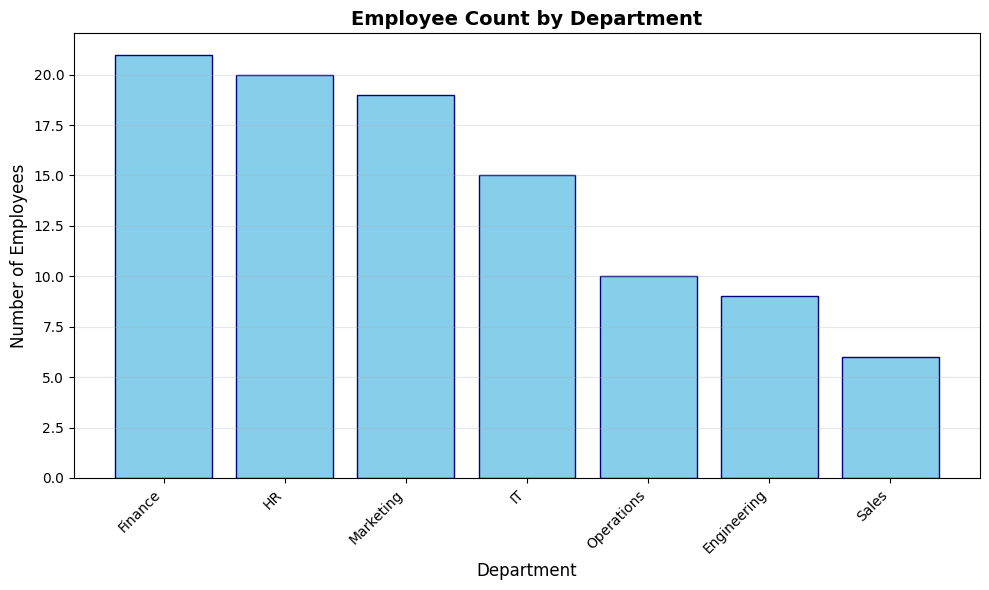

In [22]:
import matplotlib.pyplot as plt

# Get department value counts
dept_counts = df_from_csv['Department'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6)) # set graph size (inches)
plt.bar(dept_counts.index, dept_counts.values, color='skyblue', edgecolor='navy') # set graph type and colors
plt.xlabel('Department', fontsize=12) # data label for x-axis
plt.ylabel('Number of Employees', fontsize=12) # data label for y-axis  
plt.title('Employee Count by Department', fontsize=14, fontweight='bold') # title of the graph
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.3) # add grid lines for y-axis
plt.tight_layout() # 
plt.show()

### Department Employee Count by Age Group

<Figure size 1200x600 with 0 Axes>

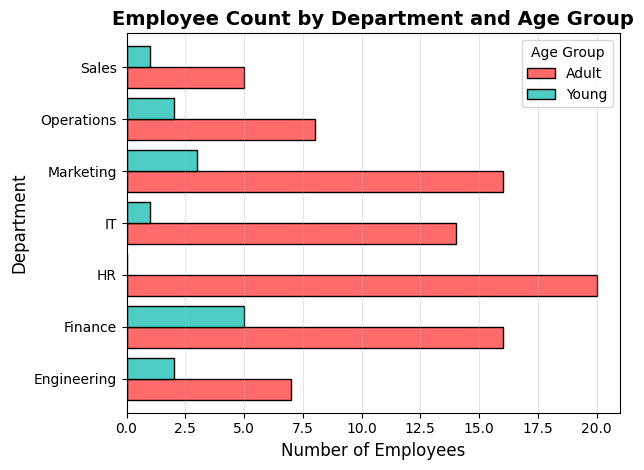

In [25]:
# department and age group counts
dept_age_counts = df_from_csv.groupby(['Department', 'Age Group']).size().unstack() # group by 2 columns and reshape data for grouped bars

# Create a grouped horizontal bar chart
plt.figure(figsize=(12, 6)) # set graph size (inches)
dept_age_counts.plot(kind='barh', color=['#FF6B6B', '#4ECDC4'], edgecolor='black', width=0.8) # create grouped horizontal bar chart with custom colors
plt.xlabel('Number of Employees', fontsize=12) # data label for x-axis
plt.ylabel('Department', fontsize=12) # data label for y-axis
plt.title('Employee Count by Department and Age Group', fontsize=14, fontweight='bold') # title of the graph
plt.legend(title='Age Group', fontsize=10) # add legend to identify age groups
plt.grid(axis='x', alpha=0.3) # add grid lines for x-axis
plt.tight_layout() # adjust layout to prevent label cutoff
plt.show() # display the chart

# Exercises

Exercise 1: Basic DataFrame Operations
Load the employees.csv file and perform the following:
- Display the first 10 rows
- Show the last 5 rows
- Get the column names
- Find the total number of employees

Exercise 2: Data Selection and Filtering
- Select only employees from the 'Finance' department
- Find all employees older than 35
- Select employees who are either in 'IT' or 'HR' departments and younger than 40
- Display only the 'FirstName', 'LastName', and 'Salary' columns for employees with salary > 60000

Exercise 3: Data Analysis and Aggregation
- Calculate the average salary by department
- Find the oldest employee in each department
- Count how many employees are in each age group
- Calculate the total salary expense by department
- Find the department with the highest average age


Exercise 4: Data Manipulation
- Create a new column 'Salary Range' that categorizes salaries as:
  - 'Low' (< 50000)
  - 'Medium' (50000–70000)
  - 'High' (> 70000)
- Sort employees by salary in descending order
- Add a column 'Full Name' that combines FirstName and LastName


Exercise 5: Case Study
- Create a comprehensive report that shows:
  - Total employees by department and age group
  - Department with highest/lowest average salary
  - Age distribution across departments
  - Any employees with missing salary data
